# Libraries

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [2]:
from set_extraction_monks import x_train_m1, y_train_m1, x_test_m1, y_test_m1, x_train_m2, y_train_m2, x_test_m2, y_test_m2, x_train_m3, y_train_m3, x_test_m3, y_test_m3

<class 'pandas.core.frame.DataFrame'>
Index: 124 entries, data_5 to data_432
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   class   124 non-null    int64
 1   a1      124 non-null    int64
 2   a2      124 non-null    int64
 3   a3      124 non-null    int64
 4   a4      124 non-null    int64
 5   a5      124 non-null    int64
 6   a6      124 non-null    int64
dtypes: int64(7)
memory usage: 7.8+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 432 entries, data_1 to data_432
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   class   432 non-null    int64
 1   a1      432 non-null    int64
 2   a2      432 non-null    int64
 3   a3      432 non-null    int64
 4   a4      432 non-null    int64
 5   a5      432 non-null    int64
 6   a6      432 non-null    int64
dtypes: int64(7)
memory usage: 27.0+ KB
Shapes before encoding:
x_train_m1 (124, 6)
y_train_m1 (124,)
x_test_m1 (

# Models

In [3]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, plot_confusion_matrix

In [4]:
results = []

# SVM

## SupportVectorClassification monk-1

### Grid search for parameter setting 


In [5]:
params = {'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
          'C' : [0.1, 0.5, 1, 2, 3],
          'coef0' : [0.0, 0.01, 0.1, 0.5],
          'gamma' : ['auto','scale'],
          'shrinking' : [True, False]
          } 

In [6]:
#hyperparameter tuning with grid search CV
n_jobs_search = -1
svc_search = SVC()

svc_cv_m1 = GridSearchCV(estimator=svc_search, param_grid=params, scoring='accuracy', cv=5, verbose=4, n_jobs=n_jobs_search) 
svc_cv_m1.fit(x_train_m1, y_train_m1)

Fitting 5 folds for each of 320 candidates, totalling 1600 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 0.5, 1, 2, 3],
                         'coef0': [0.0, 0.01, 0.1, 0.5],
                         'gamma': ['auto', 'scale'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                         'shrinking': [True, False]},
             scoring='accuracy', verbose=4)

In [7]:
svc_cv_m1.best_params_

{'C': 1, 'coef0': 0.5, 'gamma': 'scale', 'kernel': 'poly', 'shrinking': True}

In [8]:
# validation
svc_cv_m1.best_score_

1.0

In [9]:
# save the model to disk
joblib.dump(svc_cv_m1.best_estimator_, 'monk_models/svc_m1.z')

['monk_models/svc_m1.z']

### Validation plot

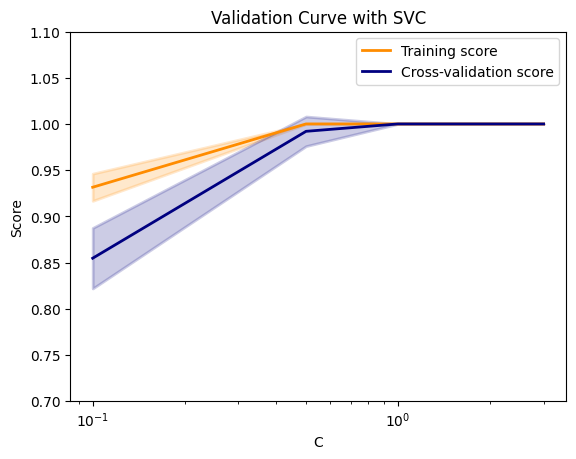

In [10]:
from sklearn.model_selection import validation_curve

param_range = [0.1, 0.5, 1, 2, 3] 

train_scores, test_scores = validation_curve(
    SVC(coef0=0.5, gamma='scale', kernel='poly', shrinking=True),
    x_train_m1,
    y_train_m1,
    param_name="C",
    param_range=param_range,
    scoring='accuracy',
    n_jobs=2
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with SVC")
plt.xlabel("C")
plt.ylabel("Score")

plt.ylim(0.7, 1.1)

lw = 2
plt.semilogx(
    param_range, train_scores_mean, label="Training score", color="darkorange", lw=lw
)

plt.fill_between(
    param_range,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.2,
    color="darkorange",
    lw=lw,
)

plt.semilogx(
    param_range, test_scores_mean, label="Cross-validation score", color="navy", lw=lw
)

plt.fill_between(
    param_range,
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.2,
    color="navy",
    lw=lw
)

plt.legend(loc="best")

plt.show()

### Final model

In [11]:
svc = joblib.load('monk_models/svc_m1.z')

In [12]:
svc

SVC(C=1, coef0=0.5, kernel='poly')

In [13]:
train_pred_svc = svc.predict(x_train_m1)

In [14]:
print('Accuracy train set')
print(classification_report(y_train_m1, train_pred_svc))

Accuracy train set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        62
           1       1.00      1.00      1.00        62

    accuracy                           1.00       124
   macro avg       1.00      1.00      1.00       124
weighted avg       1.00      1.00      1.00       124



In [15]:
test_pred_svc = svc.predict(x_test_m1)

In [16]:
print('Accuarcy test set')
print(classification_report(y_test_m1, test_pred_svc))

Accuarcy test set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       216
           1       1.00      1.00      1.00       216

    accuracy                           1.00       432
   macro avg       1.00      1.00      1.00       432
weighted avg       1.00      1.00      1.00       432



C:\Users\veron\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


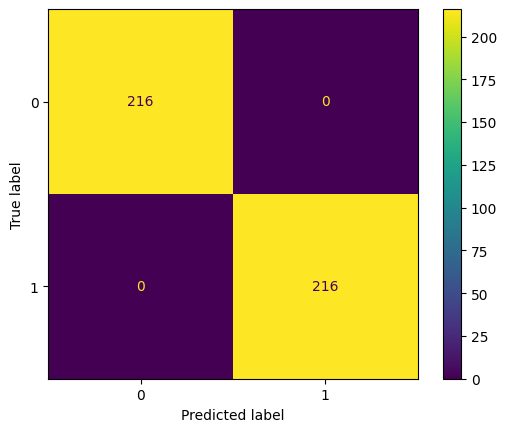

In [17]:
plot_confusion_matrix(svc, x_test_m1, y_test_m1)
plt.show() 

In [18]:
results.append(('SupportVectorClassification monk-1 train', accuracy_score(y_train_m1, train_pred_svc)))
results.append(('SupportVectorClassification monk-1 validation', svc_cv_m1.best_score_))
results.append(('SupportVectorClassification monk-1 test', accuracy_score(y_test_m1, test_pred_svc)))

## SupportVectorClassification monk-2

### Grid search for parameter setting 


In [19]:
params = {'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
          'C' : [0.1, 0.3, 0.5, 0.7, 0.8, 1, 1,1, 1.2, 1.5, 1.8, 1.9, 2],
          'coef0' : [0.0, 0.01, 0.1, 0.5, 0.9, 1, 1.5, 2, 2.5,3, 5, 7],
          'gamma' : ['auto','scale'],
          'shrinking' : [True, False]
          } 

In [20]:
#hyperparameter tuning with grid search CV
n_jobs_search = -1
svc_search = SVC()

svc_cv_m2 = GridSearchCV(estimator=svc_search, param_grid=params, scoring='accuracy', cv=5, verbose=4, n_jobs=n_jobs_search) 
svc_cv_m2.fit(x_train_m2, y_train_m2)

Fitting 5 folds for each of 2496 candidates, totalling 12480 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 0.3, 0.5, 0.7, 0.8, 1, 1, 1, 1.2, 1.5, 1.8,
                               1.9, 2],
                         'coef0': [0.0, 0.01, 0.1, 0.5, 0.9, 1, 1.5, 2, 2.5, 3,
                                   5, 7],
                         'gamma': ['auto', 'scale'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                         'shrinking': [True, False]},
             scoring='accuracy', verbose=4)

In [21]:
svc_cv_m2.best_params_

{'C': 1.8, 'coef0': 7, 'gamma': 'scale', 'kernel': 'poly', 'shrinking': True}

In [22]:
# validation
svc_cv_m2.best_score_

0.8408199643493761

In [23]:
# save the model to disk
joblib.dump(svc_cv_m2.best_estimator_, 'monk_models/svc_m2.z')

['monk_models/svc_m2.z']

### Validation plot

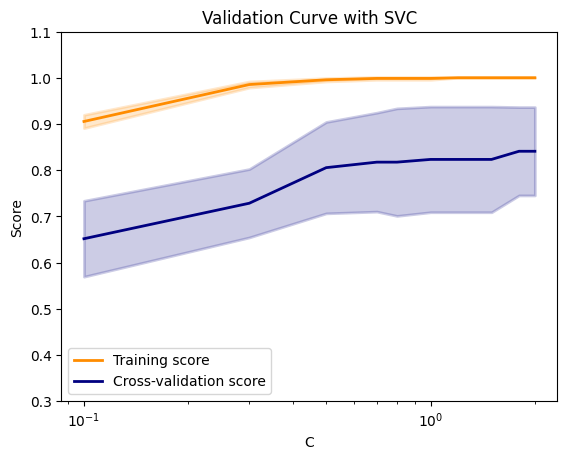

In [24]:
from sklearn.model_selection import validation_curve

param_range =  [0.1, 0.3, 0.5, 0.7, 0.8, 1, 1,1, 1.2, 1.5, 1.8, 1.9, 2] 

train_scores, test_scores = validation_curve(
    SVC(coef0=7, gamma='scale', kernel='poly', shrinking=True),
    x_train_m2,
    y_train_m2,
    param_name="C",
    param_range=param_range,
    scoring='accuracy',
    n_jobs=2
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with SVC")
plt.xlabel("C")
plt.ylabel("Score")

#plt.xticks(param_range, param_range)
plt.ylim(0.3, 1.1)

lw = 2
plt.semilogx(
    param_range, train_scores_mean, label="Training score", color="darkorange", lw=lw
)

plt.fill_between(
    param_range,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.2,
    color="darkorange",
    lw=lw,
)

plt.semilogx(
    param_range, test_scores_mean, label="Cross-validation score", color="navy", lw=lw
)

plt.fill_between(
    param_range,
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.2,
    color="navy",
    lw=lw
)

plt.legend(loc="best")

plt.show()

### Final model

In [25]:
svc = joblib.load('monk_models/svc_m2.z')

In [26]:
svc

SVC(C=1.8, coef0=7, kernel='poly')

In [27]:
train_pred_svc = svc.predict(x_train_m2)

In [28]:
print('Accuracy train set')
print(classification_report(y_train_m2, train_pred_svc))

Accuracy train set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       105
           1       1.00      1.00      1.00        64

    accuracy                           1.00       169
   macro avg       1.00      1.00      1.00       169
weighted avg       1.00      1.00      1.00       169



In [29]:
test_pred_svc = svc.predict(x_test_m2)

In [30]:
print('Accuarcy test set')
print(classification_report(y_test_m2, test_pred_svc))

Accuarcy test set
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       290
           1       0.99      1.00      0.99       142

    accuracy                           1.00       432
   macro avg       0.99      1.00      0.99       432
weighted avg       1.00      1.00      1.00       432



C:\Users\veron\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


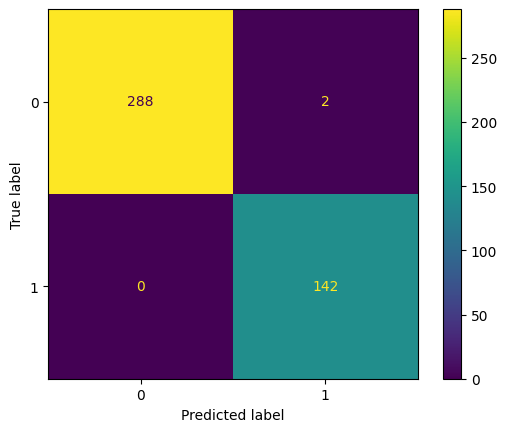

In [31]:
plot_confusion_matrix(svc, x_test_m2, y_test_m2)
plt.show() 

In [32]:
results.append(('SupportVectorClassification monk-2 train', accuracy_score(y_train_m2, train_pred_svc)))
results.append(('SupportVectorClassification monk-2 validation', svc_cv_m2.best_score_))
results.append(('SupportVectorClassification monk-2 test', accuracy_score(y_test_m2, test_pred_svc)))

## SupportVectorClassification monk-3

### Grid search for parameter setting 


In [33]:
params = {'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
          'C' : [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.2, 0.3, 0.4, 0.5, 1],
          'coef0' : [0.0, 0.01, 0.1, 0.5, 1, 1.2, 1.5, 1.8, 2],
          'gamma' : ['auto','scale'],
          'shrinking' : [True, False]
          } 

In [34]:
#hyperparameter tuning with grid search CV
n_jobs_search = -1
svc_search = SVC()

svc_cv_m3 = GridSearchCV(estimator=svc_search, param_grid=params, scoring='accuracy', cv=5, verbose=4, n_jobs=n_jobs_search) 
svc_cv_m3.fit(x_train_m3, y_train_m3)

Fitting 5 folds for each of 2160 candidates, totalling 10800 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08,
                               0.09, 0.1, 0.2, 0.3, 0.4, 0.5, 1],
                         'coef0': [0.0, 0.01, 0.1, 0.5, 1, 1.2, 1.5, 1.8, 2],
                         'gamma': ['auto', 'scale'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                         'shrinking': [True, False]},
             scoring='accuracy', verbose=4)

In [35]:
svc_cv_m3.best_params_

{'C': 0.02,
 'coef0': 1.5,
 'gamma': 'scale',
 'kernel': 'poly',
 'shrinking': True}

In [36]:
# validation
svc_cv_m3.best_score_

0.9339999999999999

In [37]:
# save the model to disk
joblib.dump(svc_cv_m3.best_estimator_, 'monk_models/svc_m3.z')

['monk_models/svc_m3.z']

### Validation plot

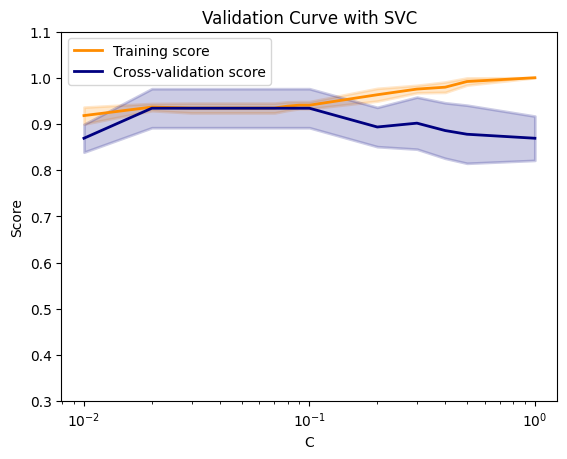

In [38]:
from sklearn.model_selection import validation_curve

param_range = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.2, 0.3, 0.4, 0.5, 1]

train_scores, test_scores = validation_curve(
    SVC(coef0=1.5, gamma='scale', kernel='poly', shrinking=True),
    x_train_m3,
    y_train_m3,
    param_name="C",
    param_range=param_range,
    scoring='accuracy',
    n_jobs=2
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with SVC")
plt.xlabel("C")
plt.ylabel("Score")

plt.ylim(0.3, 1.1)

lw = 2
plt.semilogx(
    param_range, train_scores_mean, label="Training score", color="darkorange", lw=lw
)

plt.fill_between(
    param_range,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.2,
    color="darkorange",
    lw=lw,
)

plt.semilogx(
    param_range, test_scores_mean, label="Cross-validation score", color="navy", lw=lw
)

plt.fill_between(
    param_range,
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.2,
    color="navy",
    lw=lw
)

plt.legend(loc="best")

plt.show()

### Final model

In [39]:
svc = joblib.load('monk_models/svc_m3.z')

In [40]:
svc

SVC(C=0.02, coef0=1.5, kernel='poly')

In [41]:
train_pred_svc = svc.predict(x_train_m3)

In [42]:
print('Accuracy train set')
print(classification_report(y_train_m3, train_pred_svc))

Accuracy train set
              precision    recall  f1-score   support

           0       0.95      0.92      0.93        62
           1       0.92      0.95      0.93        60

    accuracy                           0.93       122
   macro avg       0.93      0.93      0.93       122
weighted avg       0.93      0.93      0.93       122



In [43]:
test_pred_svc = svc.predict(x_test_m3)

In [44]:
print('Accuarcy test set')
print(classification_report(y_test_m3, test_pred_svc))

Accuarcy test set
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       204
           1       1.00      0.95      0.97       228

    accuracy                           0.97       432
   macro avg       0.97      0.97      0.97       432
weighted avg       0.97      0.97      0.97       432



C:\Users\veron\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


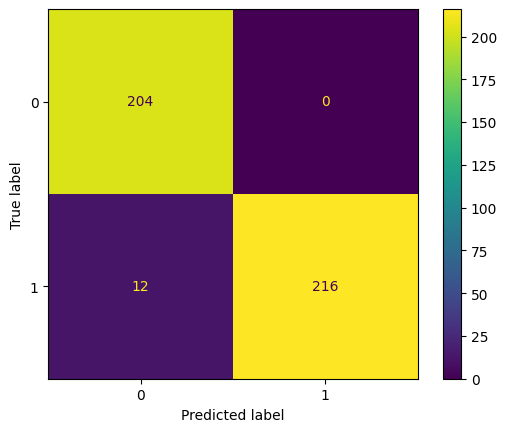

In [45]:
plot_confusion_matrix(svc, x_test_m3, y_test_m3)
plt.show() 

In [46]:
results.append(('SupportVectorClassification monk-3 train', accuracy_score(y_train_m3, train_pred_svc)))
results.append(('SupportVectorClassification monk-3 validation', svc_cv_m3.best_score_))
results.append(('SupportVectorClassification monk-3 test', accuracy_score(y_test_m3, test_pred_svc)))

# Summary

In [47]:
for i in range(len(results)):
  print(results[i])

('SupportVectorClassification monk-1 train', 1.0)
('SupportVectorClassification monk-1 validation', 1.0)
('SupportVectorClassification monk-1 test', 1.0)
('SupportVectorClassification monk-2 train', 1.0)
('SupportVectorClassification monk-2 validation', 0.8408199643493761)
('SupportVectorClassification monk-2 test', 0.9953703703703703)
('SupportVectorClassification monk-3 train', 0.9344262295081968)
('SupportVectorClassification monk-3 validation', 0.9339999999999999)
('SupportVectorClassification monk-3 test', 0.9722222222222222)
